In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_tickets=pd.read_excel("/content/drive/MyDrive/copy of data 1yr.xlsx")

In [ ]:
df_tickets.head()

,Assignment Group,Status,Priority,Short Description,Service Type,Created Time,Resolved Time,Tower,Application Name,Criticality,...,Aging Bucket,SNOW SLA Type,SLA Source,CTS SLA,E2E SLA,MTTR,MTTR Target,Change Related,Pending Status Once,Module
0,GLOBAL-IT-APP-SAP-SEC,Fulfilled,2 - High,6166 plant roles for QUM related access,Service Request,2021-11-24 15:33:56,2021-11-24 18:51:41,TBD,TBD,TBD,...,NaN,Gold Resolution (Apps team - 2 Days),SNOW,Met,Met,Met,Within Target,No,No,SEC
1,GLOBAL-IT-APP-SAP-SEC,Fulfilled,2 - High,XXX- 010 & 410 additional access,Service Request,2021-11-25 14:12:03,2021-11-29 15:51:56,TBD,TBD,TBD,...,NaN,Gold Resolution (Apps team - 2 Days),SNOW,Met,Missed,Missed,Target Missed,No,No,SEC
2,GLOBAL-IT-APP-SAP-P2P,Resolved,2 - High,Company EPD Japan (SAP XXX) XXX 410 ABAP RUN t...,Incident,2021-10-21 22:40:01,2021-10-22 00:01:23,TBD,TBD,TBD,...,NaN,P2 Gold Resolution (Apps team - 8 hours),SNOW,Met,Met,Met,Within Target,No,No,P2P
3,GLOBAL-IT-APP-SAP-OTC,Closed,2 - High,new seg. create is impacted transfer orders in...,Incident,2021-10-05 14:43:17,2021-10-05 16:41:18,TBD,TBD,TBD,...,NaN,P2 Gold Resolution (Apps team - 8 hours),SNOW,Met,Met,Met,Within Target,No,No,OTC
4,GLOBAL-IT-APP-SAP-OTC,Closed,2 - High,Address Change to Invoice and Shipping documents,Service Request,2021-08-27 17:41:25,2021-09-15 22:55:45,TBD,TBD,TBD,...,NaN,P2 Resolution (Infra team - 1 Day),SNOW,Met,Missed,Missed,Target Missed,Yes,Yes,OTC


In [ ]:
df_tickets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20311 entries, 0 to 20310
Data columns (total 44 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Assignment Group            20311 non-null  object        
 1   Status                      20311 non-null  object        
 2   Priority                    20311 non-null  object        
 3   Short Description           20308 non-null  object        
 4   Service Type                20311 non-null  object        
 5   Created Time                20311 non-null  datetime64[ns]
 6   Resolved Time               20311 non-null  datetime64[ns]
 7   Tower                       20311 non-null  object        
 8   Application Name            19546 non-null  object        
 9   Criticality                 19546 non-null  object        
 10  Coverage                    19546 non-null  object        
 11  Geography                   19541 non-null  object    

In [ ]:
df_tickets.describe()

,Courtesy,Knowledge,Timeliness,Quality,Overall,OverallAVG,Year,Open,Resolved,Backlog,Resolution Time (in mins.),Resolution Time (in hrs.),Age (Days),Aging Bucket
count,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,20311.000000,20311.000000,20311.000000,20311.000000,2.031100e+04,20311.000000,0.0,0.0
mean,4.496314,4.464373,4.476658,4.530713,4.518428,4.497297,2021.171927,0.865492,0.999409,0.000591,8.859621e+03,147.660353,NaN,NaN
std,0.994745,0.981646,0.951442,0.935567,0.873264,0.863358,0.377326,0.341206,0.024300,0.024300,3.074781e+04,512.463527,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.200000,2021.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,NaN,NaN
25%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2021.000000,1.000000,1.000000,0.000000,1.020000e+02,1.700000,NaN,NaN
50%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2021.000000,1.000000,1.000000,0.000000,9.540000e+02,15.900000,NaN,NaN
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2021.000000,1.000000,1.000000,0.000000,6.484600e+03,108.076667,NaN,NaN
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2022.000000,1.000000,1.000000,1.000000,2.029131e+06,33818.855000,NaN,NaN


In [ ]:
df_res=df_tickets[["Created Time","Resolved"]].copy()

In [ ]:
df_res.head()

,Created Time,Resolved
0,2021-11-24 15:33:56,1
1,2021-11-25 14:12:03,1
2,2021-10-21 22:40:01,1
3,2021-10-05 14:43:17,1
4,2021-08-27 17:41:25,1


In [ ]:
type(df_res)

pandas.core.frame.DataFrame

In [ ]:
df_res.columns=["CT","R"]
df_res.head()

,CT,R
0,2021-11-24 15:33:56,1
1,2021-11-25 14:12:03,1
2,2021-10-21 22:40:01,1
3,2021-10-05 14:43:17,1
4,2021-08-27 17:41:25,1


In [ ]:
df_res["CT"]=pd.to_datetime(df_res["CT"])

In [ ]:
df_res.head()

,CT,R
0,2021-11-24 15:33:56,1
1,2021-11-25 14:12:03,1
2,2021-10-21 22:40:01,1
3,2021-10-05 14:43:17,1
4,2021-08-27 17:41:25,1


In [ ]:
df_ress=df_res.groupby([df_res["CT"].dt.year,df_res["CT"].dt.month,df_res["CT"].dt.day]).agg({"R":sum})

In [ ]:
df_ress.head()

R
CT   CT CT   
2017 5  2   1
2020 6  30  1
     7  17  1
        21  1
     9  1   1

In [ ]:

df_ress.reset_index(level=2)


CT   R
CT   CT        
2017 5    2   1
2020 6   30   1
     7   17   1
     7   21   1
     9    1   1
...      ..  ..
2022 2   24  55
     2   25  73
     2   26  14
     2   27   1
     2   28  37

[444 rows x 2 columns]

In [ ]:
df_ress.reset_index(level=2,inplace=True)
df_ress.columns=["day","sales"]


In [ ]:
df_ress

day  sales
CT   CT            
2017 5     2      1
2020 6    30      1
     7    17      1
     7    21      1
     9     1      1
...      ...    ...
2022 2    24     55
     2    25     73
     2    26     14
     2    27      1
     2    28     37

[444 rows x 2 columns]

In [ ]:
df_ress.reset_index(level=1,inplace=True)

In [ ]:
df_ress.columns=["month","day","T"]

In [ ]:

df_ress.reset_index(inplace=True)

In [ ]:
df_ress.columns=["year","month","day","T"]

In [ ]:
df_ress.head()

,year,month,day,T
0,2017,5,2,1
1,2020,6,30,1
2,2020,7,17,1
3,2020,7,21,1
4,2020,9,1,1


In [ ]:
def ret_time(x):
  return pd.to_datetime(str(x["year"])+"-"+str(x["month"])+"-"+str(x["day"]))

In [ ]:
df_ress["date"]=df_ress.apply(ret_time,axis=1)


In [ ]:
df_ress.head()
df_ress.tail()

,year,month,day,T,date
439,2022,2,24,55,2022-02-24
440,2022,2,25,73,2022-02-25
441,2022,2,26,14,2022-02-26
442,2022,2,27,1,2022-02-27
443,2022,2,28,37,2022-02-28


In [ ]:
df_ress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    444 non-null    int64         
 1   month   444 non-null    int64         
 2   day     444 non-null    int64         
 3   T       444 non-null    int64         
 4   date    444 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(4)
memory usage: 17.5 KB


In [ ]:
df_ress.drop(columns=["year","month","day"],inplace=True)
df_ress=df_ress[["date","T"]]
df_ress.head()

,date,T
0,2017-05-02,1
1,2020-06-30,1
2,2020-07-17,1
3,2020-07-21,1
4,2020-09-01,1


In [ ]:
df_ress.to_csv("datacleaned.csv",index=False)

In [ ]:
df=pd.read_csv("datacleaned.csv")

<Figure size 1440x360 with 0 Axes>

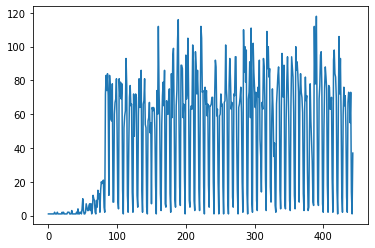

<Figure size 1440x360 with 0 Axes>

In [ ]:
plt.plot(df["T"])
plt.figure(figsize=(20,5))

In [ ]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(df["T"])
print("ADF-",result[0])
print("P-",result[1])

ADF- -2.399450761799933
P- 0.14189148712171779


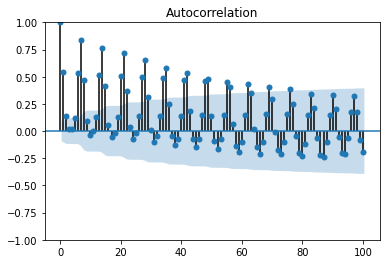

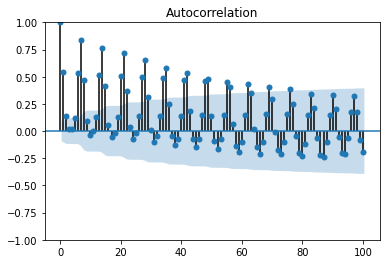

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df["T"],lags=100)

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pmdarima.arima.utils import ndiffs

In [ ]:
z=df["T"]
ndiffs(z,test='kpss')

1

In [ ]:
ndiffs(z,test='adf')

1

In [ ]:
ndiffs(z,test='pp')

0

ARIMA 


In [ ]:
from pmdarima import auto_arima

In [ ]:
from inspect import trace
model=auto_arima(df["T"],start_p=1,start_q=1,test="adf",
                 max_p=10,max_q=10,
                 m=1,
                 d=None,
                 seasonal=True,
                 start_P=0,
                 D=0,
                 trace=True,
                 error_action='ignore',
                 suppress_warnings=True,
                 stepwise=True
                )

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4235.541, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4378.821, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4379.719, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4298.865, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4376.823, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4165.188, Time=0.31 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=4333.179, Time=0.18 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=4151.000, Time=0.48 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=4319.475, Time=0.24 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=4087.657, Time=0.68 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=4282.131, Time=0.30 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=3935.461, Time=1.23 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=4055.657, Time=0.48 sec
 ARIMA(6,1,1)(0,0,0)[0] intercept   : AIC=3798.401, Time=1.81 sec
 ARIMA(6,1,0)(0,0,0)[0] intercept

In [ ]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  444
Model:              SARIMAX(10, 1, 5)   Log Likelihood               -1871.898
Date:                Thu, 16 Jun 2022   AIC                           3775.796
Time:                        07:06:59   BIC                           3841.293
Sample:                             0   HQIC                          3801.628
                                - 444                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6470      0.133     -4.868      0.000      -0.907      -0.386
ar.L2          0.0608      0.161      0.377      0.706      -0.255       0.377
ar.L3         -0.0092      0.161     -0.057      0.9

In [ ]:
trained=df.iloc[60:434]
testes=df.iloc[434:]
trained.head()

,date,T
60,2021-02-03,7
61,2021-02-04,3
62,2021-02-05,7
63,2021-02-07,1
64,2021-02-08,4


In [ ]:
model=auto_arima(trained["T"],start_p=1,start_q=1,test="adf",
                 max_p=10,max_q=10,
                 m=1,
                 d=None,
                 seasonal=True,
                 start_P=0,
                 D=0,
                 trace=True,
                 error_action='ignore',
                 suppress_warnings=True,
                 stepwise=True
                )

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=3721.241, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4156.607, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=3720.481, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=3878.876, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=3721.966, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=3713.266, Time=0.18 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=3572.647, Time=0.41 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=3698.131, Time=0.10 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=3562.208, Time=0.55 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=3691.994, Time=0.13 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=3510.286, Time=0.68 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=3665.630, Time=0.18 sec
 ARIMA(6,0,1)(0,0,0)[0]             : AIC=3385.920, Time=0.69 sec
 ARIMA(6,0,0)(0,0,0)[0]             : AIC=inf, Time=0.31 sec
 ARIMA(7,0,1)(0,0,0)[0]             : 

In [ ]:
model.fit(trained["T"])

ARIMA(order=(8, 0, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
len(testes)

10

In [ ]:
forecast,confidence_interval=model.predict(n_periods=10,return_conf_int=True,alpha=0.05)

In [ ]:
len(forecast)

10

In [ ]:
confidence_interval.shape

(10, 2)

In [ ]:
testes["forecast"]=forecast
testes["lower"]=confidence_interval[:,0]
testes["higher"]=confidence_interval[:,1]
testes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,date,T,forecast,lower,higher
434,2022-02-19,11,10.719771,-25.244248,46.683791
435,2022-02-20,2,8.853921,-28.797964,46.505805
436,2022-02-21,67,56.232728,18.349445,94.116011
437,2022-02-22,73,70.318594,32.343896,108.293292
438,2022-02-23,72,63.764731,25.672441,101.857022
439,2022-02-24,55,66.462251,28.351396,104.573105
440,2022-02-25,73,47.340241,8.663697,86.016786
441,2022-02-26,14,11.814295,-36.514975,60.143564
442,2022-02-27,1,14.725133,-35.128735,64.579002
443,2022-02-28,37,53.592343,3.582590,103.602096


In [ ]:
from pmdarima.metrics import smape

In [ ]:


mpe=smape(testes["T"],testes["forecast"])
print(mpe)

45.18695510752902
